In [158]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

In [159]:
def get_data():
    data = load_svmlight_file("data\\australian_scale")
    return data[0], data[1]

X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [160]:
def cost(W,b,X,Y):
    C = 5
    cost = np.sum(np.square(W))/2 + C*np.sum(np.maximum(0,1-Y*(np.dot(W.T,X)+b)))/X.shape[1]
    return cost

In [161]:
def loss(W,b,X,Y):
    C = 5
    GW = np.zeros(X.shape[1])
    Gb = 0
    filt = (1-Y*(np.dot(W.T,X)+b))>0
    GW = W - C*np.dot(Y*filt,X.T).T/X.shape[1]
    Gb = -C*np.sum(Y*filt*b)/X.shape[1]
    return GW,Gb

In [162]:
def main(n,X_train,y_train,X_test,y_test):
    C = 10
    lenrate = 0.01
    trainCost = []
    validCost = []
    W = np.zeros((X_train.shape[0],1))
    b = 0
    for i in range(n):       
        GW,Gb = loss(W,b,X_train,y_train)
        train = cost(W,b,X_train,y_train)
        trainCost.append(train)
        valid = cost(W,b,X_test,y_test)
        validCost.append(valid)
        DW = -GW
        Db = -Gb
        W = W + lenrate*DW
        b = b + lenrate*Db
    return trainCost,validCost

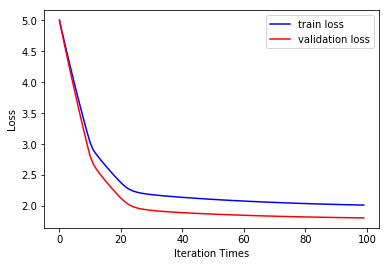

In [163]:
X_train = X_train.T.toarray()
X_test = X_test.T.toarray()
y_train = np.reshape(y_train,(1,y_train.shape[0]))
y_test = np.reshape(y_test,(1,y_test.shape[0]))
n = 100
trainCost,vaildCost = main(n,X_train,y_train,X_test,y_test)


plt.figure(1)
x = np.arange(0, n, 1)
plt.xlabel('Iteration Times')
plt.ylabel('Loss')
plt.plot(x,trainCost,color="b",label = "train loss")
plt.plot(x,vaildCost,color="r",label = "validation loss")
plt.legend(loc='upper right')
plt.show()